In [2]:
import numpy as np
import cv2
cv2.ocl.setUseOpenCL(False)
from matplotlib import pyplot as plt
import contamination_detection

## Load images, one contaminated and other one not contaminated

In [3]:
path = "/home/natalija/Documents/HackZurich/contamination_detection/contamination1.jpg"
no_path = "/home/natalija/Documents/HackZurich//contamination_detection/no_contamination1.jpg"

image = contamination_detection.feature_image(path)
no_image = contamination_detection.feature_image(no_path)

## Blob detection 
https://www.learnopencv.com/blob-detection-using-opencv-python-c/

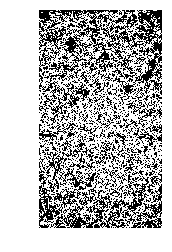

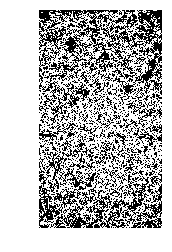

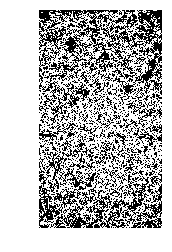

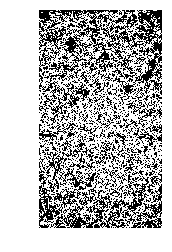

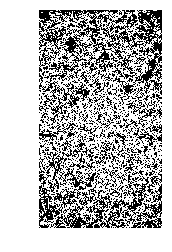

In [40]:
 
# Read image
im = cv2.imread('/home/natalija/Documents/HackZurich/contamination_detection/contamination1.jpg', cv2.IMREAD_GRAYSCALE)
# Set up the detector with default parameters.
d = cv2.Canny(im, 0, 230 )
for i in range(5): 
    d = cv2.dilate(d, None, iterations=1)
    D = cv2.blur(d, (5,5))
    d = cv2.erode(d, None, iterations=1)
    plt.axis("off")
    plt.imshow(d, "gray")
    plt.show()

## Detect feature in image, one by one all 8
https://www.learnopencv.com/blob-detection-using-opencv-python-c/
http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html

Not enough matches are found - 3/10


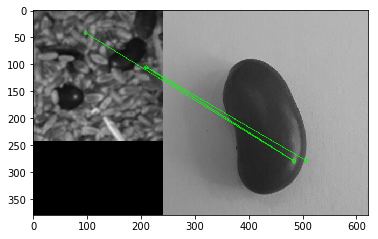

(<matplotlib.image.AxesImage at 0x7f7882f4b4e0>, None)

In [49]:
MIN_MATCH_COUNT = 10

img1 = cv2.imread('/home/natalija/Documents/HackZurich/contamination_detection/contamination1_f.jpg',0)  # queryImage
img2 = cv2.imread('/home/natalija/Documents/HackZurich/contamination_detection/first.jpg',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()


# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

img1 = cv2.blur(img1, (5,5))

FLANN_INDEX_KDTREE = 0

flann = cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)
matches = flann.knnMatch(des1, des2, k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.85*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)], True, 255, 3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

## Take a picture with the camera and save it

In [5]:
def take_picture(path):
    camera = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 
    ret,frame = camera.read() # return a single frame in variable `frame`
    cv2.imwrite(path,frame)
    cv2.destroyAllWindows()
    cap.release()